<a href="https://colab.research.google.com/github/calarconf/computacion-visual/blob/main/Taller4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

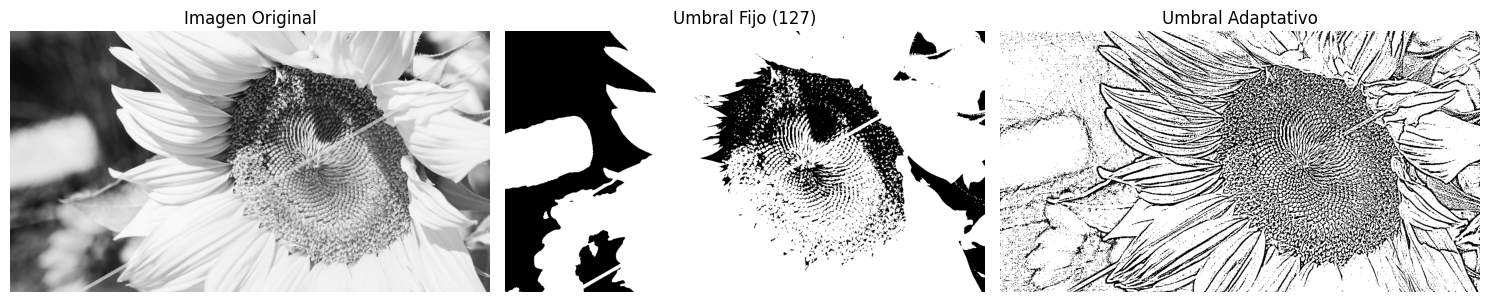

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
image_path = "/content/GirasolGrises.jpg"  # Cambia por tu ruta de imagen
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Asegurarse que la imagen se cargó correctamente
if gray_image is None:
    raise ValueError("No se pudo cargar la imagen. Verifica la ruta.")

# Umbralización fija
_, fixed_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Umbralización adaptativa
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)

# Mostrar resultados usando matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

axes[1].imshow(fixed_thresh, cmap='gray')
axes[1].set_title('Umbral Fijo (127)')
axes[1].axis('off')

axes[2].imshow(adaptive_thresh, cmap='gray')
axes[2].set_title('Umbral Adaptativo')
axes[2].axis('off')

plt.tight_layout()
plt.show()

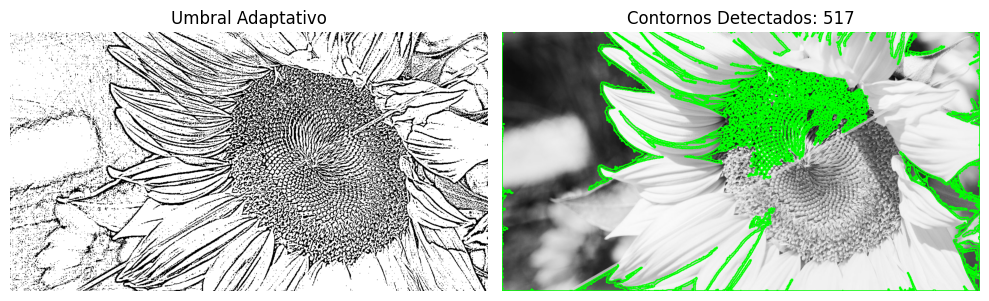

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
image_path = "/content/GirasolGrises.jpg"  # Cambia por tu ruta de imagen
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Asegurarse que la imagen se cargó correctamente
if gray_image is None:
    raise ValueError("No se pudo cargar la imagen. Verifica la ruta.")

# Umbralización fija
_, fixed_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Umbralización adaptativa
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)

# Detección de contornos
contours, hierarchy = cv2.findContours(
    adaptive_thresh,
    cv2.RETR_EXTERNAL,  # Modo de recuperación: solo contornos externos
    cv2.CHAIN_APPROX_SIMPLE  # Método de aproximación: comprime puntos redundantes
)

# Crear una versión en color de la imagen original para dibujar los contornos
image_with_contours = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)  # Color verde, grosor 2

# Convertir de BGR a RGB para visualización correcta en matplotlib
image_with_contours_rgb = cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Imagen umbralizada
axes[0].imshow(adaptive_thresh, cmap='gray')
axes[0].set_title('Umbral Adaptativo')
axes[0].axis('off')

# Imagen con contornos
axes[1].imshow(image_with_contours_rgb)
axes[1].set_title(f'Contornos Detectados: {len(contours)}')
axes[1].axis('off')

plt.tight_layout()
plt.show()



Métricas Estadísticas:
- Número de formas detectadas: 517
- Área promedio: 1544.36 píxeles²
- Perímetro promedio: 100.36 píxeles


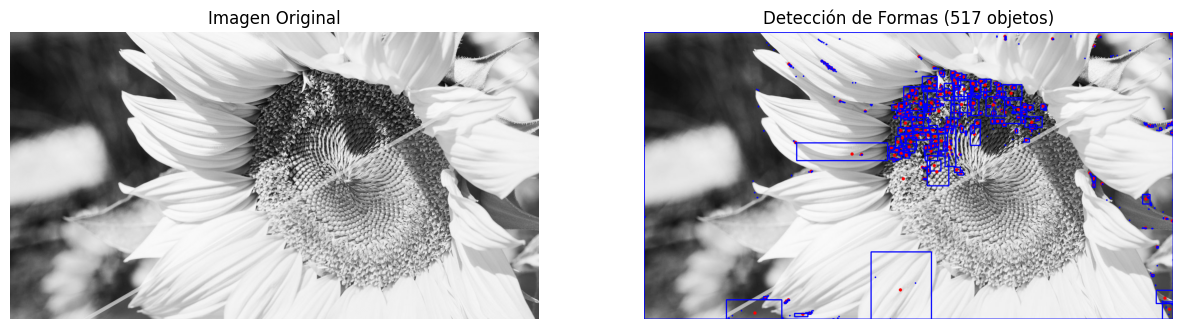

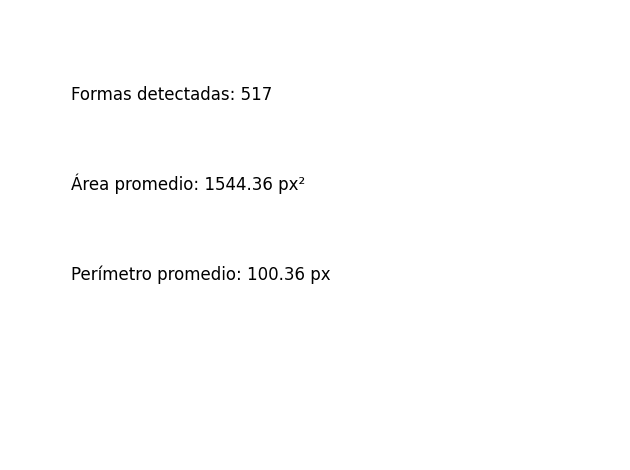

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
image_path = "/content/GirasolGrises.jpg"  # Cambia por tu ruta de imagen
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Asegurarse que la imagen se cargó correctamente
if gray_image is None:
    raise ValueError("No se pudo cargar la imagen. Verifica la ruta.")

# Umbralización fija
_, fixed_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Umbralización adaptativa
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255,
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)


# Detectar contornos
contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear imagen para visualización
output_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
areas = []
perimeters = []

# Procesar cada contorno
for contour in contours:
    # Calcular momentos y centro de masa
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0

    # Dibujar centro de masa
    cv2.circle(output_image, (cx, cy), 4, (0, 0, 255), -1)  # Punto rojo

    # Calcular y dibujar bounding box
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(output_image, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Rectángulo azul

    # Calcular métricas
    area = cv2.contourArea(contour)
    perimeter = cv2.arcLength(contour, True)
    areas.append(area)
    perimeters.append(perimeter)

# Convertir a RGB para visualización
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

# Calcular estadísticas
num_shapes = len(contours)
avg_area = np.mean(areas) if areas else 0
avg_perimeter = np.mean(perimeters) if perimeters else 0

# Crear figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Mostrar imagen original
ax1.imshow(gray_image, cmap='gray')
ax1.set_title('Imagen Original')
ax1.axis('off')

# Mostrar resultados
ax2.imshow(output_image_rgb)
ax2.set_title(f'Detección de Formas ({num_shapes} objetos)')
ax2.axis('off')

# Mostrar métricas en consola
print("\nMétricas Estadísticas:")
print(f"- Número de formas detectadas: {num_shapes}")
print(f"- Área promedio: {avg_area:.2f} píxeles²")
print(f"- Perímetro promedio: {avg_perimeter:.2f} píxeles")

# Opcional: Mostrar métricas en la figura
plt.figure()
plt.text(0.1, 0.8, f'Formas detectadas: {num_shapes}', fontsize=12)
plt.text(0.1, 0.6, f'Área promedio: {avg_area:.2f} px²', fontsize=12)
plt.text(0.1, 0.4, f'Perímetro promedio: {avg_perimeter:.2f} px', fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()
